Warning message:
"package 'MLmetrics' is in use and will not be installed"


In [5]:
library("zoo")                        # Load zoo package
library(forecast)
library(ggplot2)
library(astsa)
library(aTSA)
library(xts)
library(plotly)
library(TSstudio)
library(MLmetrics)

In [6]:
Data <- read.csv("C:\\Users\\conal\\Desktop\\MCM\\Practicum\\data\\ETH,gas,usage merged_5min 11-26 to 01-26.csv")

In [7]:
FullData <- na.locf(Data)
tail(FullData)

,datetime,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17851,2022-01-26 23:30:00,30035402,17285399,2473.084,199.4940,622.8463,182.6880,0.5755651
17852,2022-01-26 23:35:00,29986314,17167475,2472.904,225.7147,639.8999,213.4140,0.5723475
17853,2022-01-26 23:40:00,30040262,16597248,2465.274,187.5205,606.5557,168.6087,0.5523320
17854,2022-01-26 23:45:00,30030977,18624956,2464.988,201.5362,553.9399,187.3668,0.6200280
17855,2022-01-26 23:50:00,29998993,17161175,2466.846,169.6238,649.6818,151.0162,0.5721265
17856,2022-01-26 23:55:00,30015425,19644043,2464.224,158.5139,548.5618,143.7652,0.6544351


In [8]:
Data <- FullData[0:1440,]
Test <- FullData[1441:1488,]
tail(Test)

,datetime,gas_limit,gas_used,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1483,2021-12-01 03:30:00,29950163,17030906,4732.534,267.3648,557.0441,242.5746,0.5685773
1484,2021-12-01 03:35:00,29961358,15906881,4728.840,291.8672,734.5097,277.3734,0.5309674
1485,2021-12-01 03:40:00,29975124,14944021,4742.594,336.8420,592.7097,314.3215,0.4984287
1486,2021-12-01 03:45:00,29968464,14335224,4729.260,226.8234,529.0747,171.4656,0.4783787
1487,2021-12-01 03:50:00,29962809,18352470,4741.576,208.4274,858.5369,178.3819,0.6124540
1488,2021-12-01 03:55:00,30002429,16134525,4745.664,213.2842,546.6245,189.2235,0.5377978


In [9]:
apply(Data, 2, function(x) any(is.na(x)))

datetime         gas_limit          gas_used              Open 
            FALSE             FALSE             FALSE             FALSE 
    avg_gas_price     max_gas_price     min_gas_price block_utilisation 
            FALSE             FALSE             FALSE             FALSE

In [10]:
Timestamp = Data$timestamp_y
gas_limit  = Data$gas_limit
gas_used  = Data$gas_used
Open  = Data$Open
avg_gas_price  = Data$avg_gas_price
max_gas_price  = Data$max_gas_price
min_gas_price  = Data$min_gas_price
block_utilisation  = Data$block_utilisation

min_gas_price_Test  = Test$min_gas_price

Series: min_gas_price 
ARIMA(1,1,3) 

Coefficients:
         ar1      ma1      ma2      ma3
      0.2224  -0.3339  -0.3905  -0.1870
s.e.  0.0889   0.0886   0.0333   0.0537

sigma^2 = 1809:  log likelihood = -7437.21
AIC=14884.42   AICc=14884.46   BIC=14910.78


	Ljung-Box test

data:  Residuals from ARIMA(1,1,3)
Q* = 2.5202, df = 6, p-value = 0.8662

Model df: 4.   Total lags used: 10



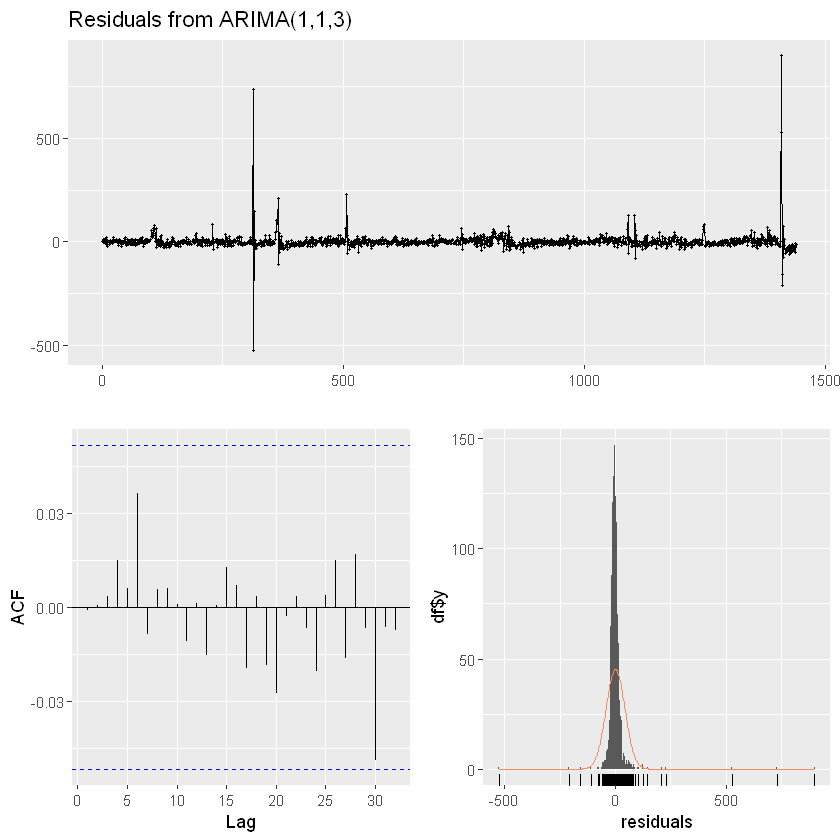

In [11]:
fit <- auto.arima(min_gas_price)
auto.arima(min_gas_price)
checkresiduals(fit)


AutoARIMA does not seem to detect seasonality, forcing with arguments does not seem to work either

P=2 and P=3 SARIMA models are similar 

initial  value 4.254304 
iter   2 value 3.902469
iter   3 value 3.833656
iter   4 value 3.827644
iter   5 value 3.817810
iter   6 value 3.810150
iter   7 value 3.803145
iter   8 value 3.800466
iter   9 value 3.798644
iter  10 value 3.796749
iter  11 value 3.796381
iter  12 value 3.796279
iter  13 value 3.796268
iter  14 value 3.796268
iter  14 value 3.796268
iter  14 value 3.796268
final  value 3.796268 
converged
initial  value 3.784054 
iter   2 value 3.783722
iter   3 value 3.783374
iter   4 value 3.783356
iter   5 value 3.783336
iter   6 value 3.783335
iter   7 value 3.783335
iter   7 value 3.783335
iter   7 value 3.783335
final  value 3.783335 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    include.mean = !no.constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2      ma3     sar1     sar2    sar3     sma1
      -0.1269  -0.4466  -0.2858  -0.0430  -0.0382  0.0037  -0.9602
s.e.   0.0252   0.0244   0.0251   0.0292   0.0366  0.0362   0.0174

sigma^2 estimated as 1844:  log likelihood = -7361.22,  aic = 14738.43

$degrees_of_freedom
[1] 1408

$ttable
     Estimate     SE  t.value p.value
ma1   -0.1269 0.0252  -5.0304  0.0000
ma2   -0.4466 0.0244 -18.2998  0.0000
ma3   -0.2858 0.0251 -11.4006  0.0000
sar1  -0.0430 0.0292  -1.4737  0.1408
sar2  -0.0382 0.0366  -1.0435  0.2969
sar3   0.0037 0.0362   0.1023  0.9185
sma1  -0.9602 0.0174 -55.1566  0.0000

$AIC
[1] 10.41585

$AICc
[1] 10.41591

$BIC
[1] 10.44556


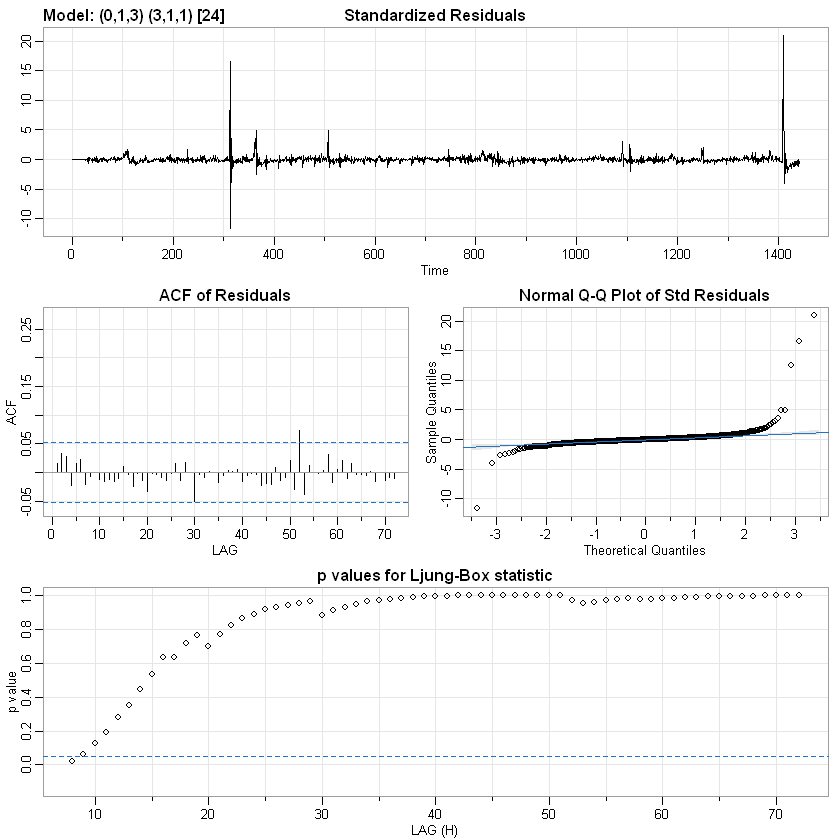

In [12]:
sarima(min_gas_price, 0,1,3,3,1,1,24)


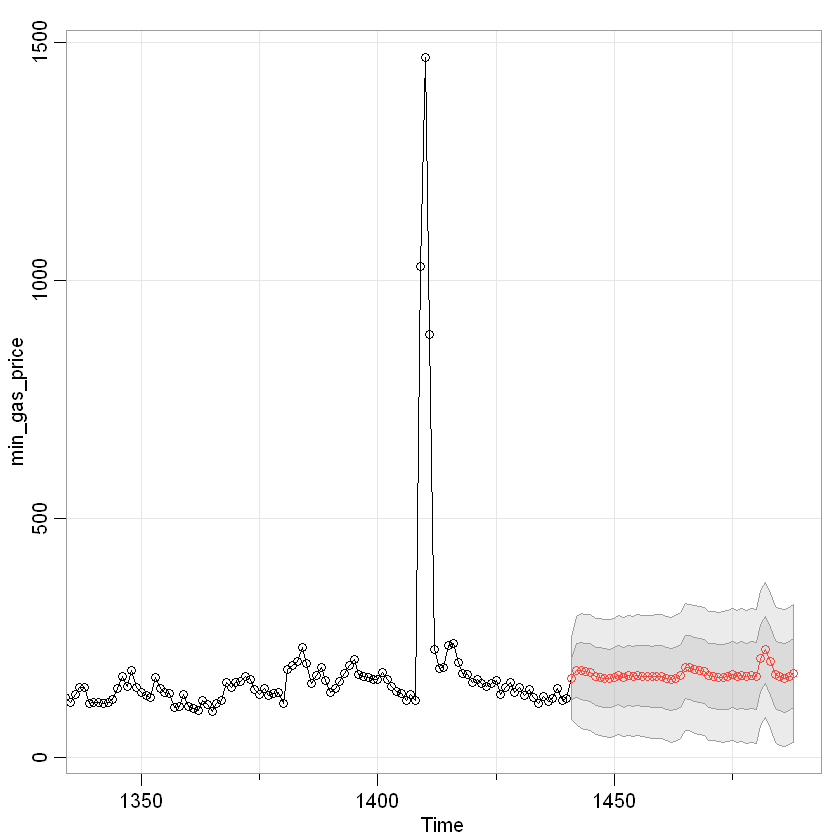

In [13]:
forecast = sarima.for(min_gas_price, 48, 0,1,3,3,1,1,24)

In [14]:
Test_ts <- xts(Test$min_gas_price, order.by=(as.POSIXct(Test$datetime, format="%Y-%m-%d %H:%M:%S")))



In [15]:
Forecast_ts <- xts(forecast$pred, start=2022-01-25, order.by=(as.POSIXct(Test$datetime, format="%Y-%m-%d %H:%M:%S")))

In [16]:
mean((Test_ts - Forecast_ts)^2)

[1] 2031.544

In [17]:
MAPE(Forecast_ts, Test_ts)

[1] 0.2252487

In [18]:
MAE(Forecast_ts, Test_ts)

[1] 35.14444

In [21]:
merged_ts <- merge(Test_ts,Forecast_ts,join='inner')

In [22]:
RMSE(Forecast_ts, Test_ts)

[1] 45.07265

In [23]:
mseries <- cbind(merged_ts) # mseries is a xts object with multiple variables


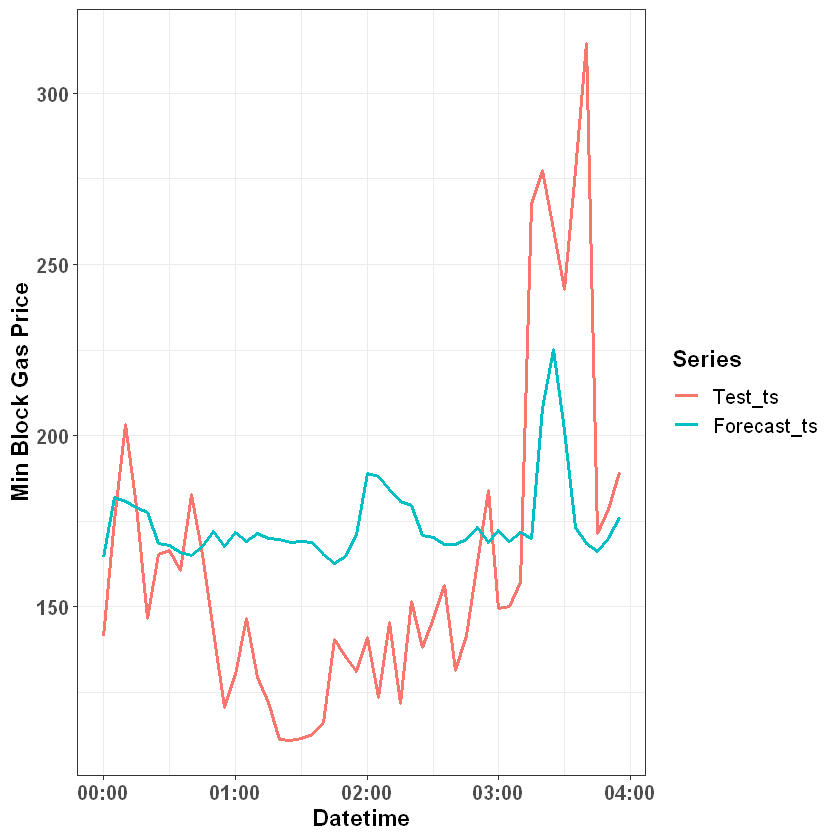

In [24]:
plot <- autoplot.zoo(mseries, facets=NULL)
plot + 
theme_bw() + 
xlab("Datetime")+ 
ylab("Min Block Gas Price")+
theme(axis.text=element_text(size=12, face="bold"),
        axis.title=element_text(size=14,face="bold"))+
theme(legend.text = element_text(size=12))+
theme(legend.title = element_text(size=14, face="bold"))+
geom_line(size = 1)